In [106]:
import pandas as pd

# Load the datasets
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')


# List of movies you are interested in
d = ['Matrix', 'Pulp Fiction', 'Forrest Gump', 'Shawshank Redemption']

# Filter the movies dataset to get movie IDs for the titles in list d
movie_ids = movies[movies['title'].isin(d)]['movieId']

if movie_ids.empty:
    print('No matching movie IDs found.')
else:
    # Filter the ratings dataset to get ratings for these movie IDs
    ratings_filtered = ratings[ratings['movieId'].isin(movie_ids)]

    if ratings_filtered.empty:
        print('No ratings found for the selected movies.')
    else:
        # Count the number of ratings for each movie
        ratings_count = ratings_filtered['movieId'].value_counts()

        if ratings_count.empty:
            print('No ratings count available.')
        else:
            # Get the movie ID with the maximum number of ratings
            max_ratings_movie_id = ratings_count.idxmax()
            max_ratings_count = ratings_count.max()

            # Get the movie title for this movie ID
            max_ratings_movie_title = movies[movies['movieId'] == max_ratings_movie_id]['title'].values[0]

            print(f'The movie with the maximum number of ratings is: {max_ratings_movie_title}')
            print(f'Number of ratings: {max_ratings_count}')


No matching movie IDs found.


In [107]:
import pandas as pd

# Load the datasets
tags = pd.read_csv('tags.csv')  # Assuming this file contains movie tags

# Movie title of interest
movie_title = "Matrix, The (1999)"

# Get movieId for the movie title
movie_id = movies[movies['title'] == movie_title]['movieId'].values[0]

# Filter tags for the movie
movie_tags = tags[tags['movieId'] == movie_id]['tag'].tolist()

# Define the provided options
options = {'alternate universe', 'karate', 'philosophy', 'post apocalyptic'}

# Check which options are in the movie tags
correct_tags = options.intersection(movie_tags)

print("Correct tags submitted by users for the movie '{}':".format(movie_title))
print(correct_tags)


Correct tags submitted by users for the movie 'Matrix, The (1999)':
{'philosophy', 'post apocalyptic', 'alternate universe'}


In [108]:
movie_title = "Terminator 2: Judgment Day (1991)"

# Get movieId for the movie title
movie_id = movies[movies['title'] == movie_title]['movieId'].values[0]

# Filter ratings for the movie
movie_ratings = ratings[ratings['movieId'] == movie_id]

# Calculate the average rating
average_rating = movie_ratings['rating'].mean()

print(f'The average user rating for the movie "{movie_title}" is: {average_rating:.2f}')


The average user rating for the movie "Terminator 2: Judgment Day (1991)" is: 3.97


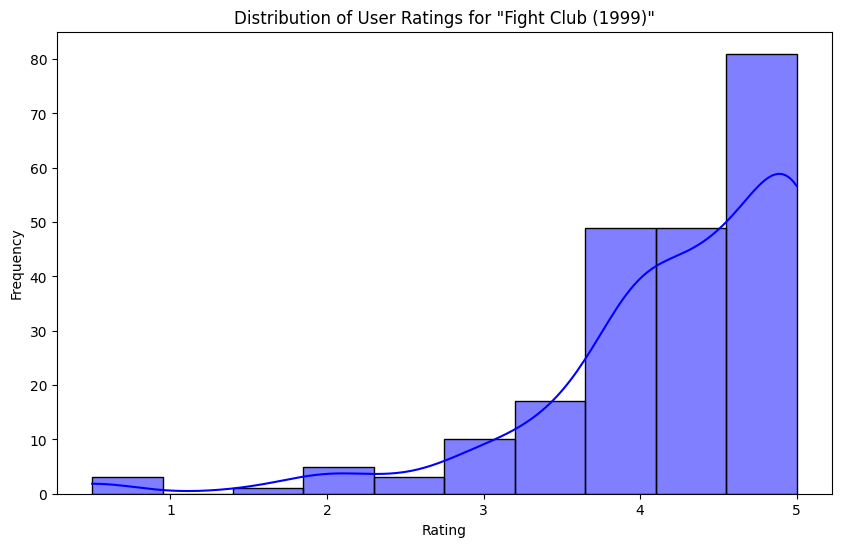

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

movie_title = "Fight Club (1999)"

# Get movieId for the movie title
movie_id = movies[movies['title'] == movie_title]['movieId'].values[0]

# Filter ratings for the movie
movie_ratings = ratings[ratings['movieId'] == movie_id]

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))

# Using Seaborn to plot a histogram and KDE (Kernel Density Estimate)
sns.histplot(movie_ratings['rating'], kde=True, bins=10, color='blue')

plt.title(f'Distribution of User Ratings for "{movie_title}"')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()


In [110]:
movies_of_interest = [
    "Godfather, The (1972)",
    "Shawshank Redemption, The (1994)",
    "Jumanji (1995)",
    "Wolf of Wall Street, The (2013)"
]

# Get movie IDs for the movies of interest
movie_ids = movies[movies['title'].isin(movies_of_interest)]['movieId']

# Filter ratings for these movie IDs
movie_ratings = ratings[ratings['movieId'].isin(movie_ids)]

# Calculate the average rating for each movie
average_ratings = movie_ratings.groupby('movieId')['rating'].mean()

# Get the movie titles with their average ratings
average_ratings_with_titles = average_ratings.reset_index().merge(movies, on='movieId')

# Find the movie with the highest average rating
most_popular_movie = average_ratings_with_titles.loc[average_ratings_with_titles['rating'].idxmax()]

print(f"The most popular movie based on average user ratings is: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['rating']:.2f}")


The most popular movie based on average user ratings is: Shawshank Redemption, The (1994)
Average Rating: 4.43


In [111]:
ratings_count = ratings.groupby('movieId').size()

# Merge with movie titles
movie_ratings_count = ratings_count.reset_index(name='rating_count').merge(movies, on='movieId')

# Get the top 5 movies based on number of ratings
top_5_movies = movie_ratings_count.nlargest(5, 'rating_count')

# List of movies of interest
movies_of_interest = [
    "Pulp Fiction (1994)",
    "Bad Boys (1995)",
    "Silence of the Lambs, The (1991)",
    "Matrix, The (1999)"
]

# Check which movies of interest are in the top 5
top_movies_of_interest = top_5_movies[top_5_movies['title'].isin(movies_of_interest)]

print("Movies in the top 5 based on number of user ratings:")
print(top_movies_of_interest[['title', 'rating_count']])

Movies in the top 5 based on number of user ratings:
                                 title  rating_count
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [112]:
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi', case=False)]

# Count the number of ratings for each Sci-Fi movie
sci_fi_ratings_count = ratings[ratings['movieId'].isin(sci_fi_movies['movieId'])].groupby('movieId').size()

# Merge with Sci-Fi movie titles
sci_fi_movie_ratings_count = sci_fi_ratings_count.reset_index(name='rating_count').merge(sci_fi_movies, on='movieId')

# Sort by the number of ratings and get the third most popular
sorted_sci_fi_movies = sci_fi_movie_ratings_count.sort_values(by='rating_count', ascending=False)
third_most_popular = sorted_sci_fi_movies.iloc[2]  # Index 2 for the third most popular

print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {third_most_popular['title']}")
print(f"Number of Ratings: {third_most_popular['rating_count']}")


The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993)
Number of Ratings: 238


In [113]:
links = pd.read_csv('links.csv')

# Count the number of ratings for each movie
ratings_count = ratings.groupby('movieId').size()

# Merge ratings count with movies data
movie_ratings_count = ratings_count.reset_index(name='rating_count').merge(movies, on='movieId')

# Filter movies with more than 50 user ratings
popular_movies = movie_ratings_count[movie_ratings_count['rating_count'] > 50]

# Merge with links to get IMDb IDs
popular_movies_with_links = popular_movies.merge(links, on='movieId')


In [115]:
import requests
from bs4 import BeautifulSoup

def get_imdb_rating(imdb_id):
    url = f'http://www.imdb.com/title/{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract IMDb rating
    rating_tag = soup.find('span', itemprop='ratingValue')
    if rating_tag:
        return float(rating_tag.get_text())
    return None

# Example to get ratings for the first few movies
imdb_ids = links['imdbId'].head()  # Example: Getting IMDb IDs of the first few movies
ratings = {}

for imdb_id in imdb_ids:
    rating = get_imdb_rating(imdb_id)
    ratings[imdb_id] = rating
    print(f"IMDb ID {imdb_id} has a rating of {rating}")

# Create a DataFrame from ratings
ratings_df = pd.DataFrame(list(ratings.items()), columns=['imdbId', 'rating'])


IMDb ID 114709 has a rating of None
IMDb ID 113497 has a rating of None
IMDb ID 113228 has a rating of None
IMDb ID 114885 has a rating of None
IMDb ID 113041 has a rating of None


In [116]:
def get_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract IMDb rating
    rating_tag = soup.find('span', itemprop='ratingValue')
    if rating_tag:
        return float(rating_tag.get_text())
    return None

# Get IMDb IDs for Sci-Fi movies
sci_fi_movie_ids = sci_fi_movies['movieId']
sci_fi_imdb_ids = links[links['movieId'].isin(sci_fi_movie_ids)]['imdbId']

# Get ratings for Sci-Fi movies
ratings = {}
for imdb_id in sci_fi_imdb_ids:
    rating = get_imdb_rating(imdb_id)
    ratings[imdb_id] = rating
    print(f"IMDb ID {imdb_id} has a rating of {rating}")

# Create a DataFrame from ratings
ratings_df = pd.DataFrame(list(ratings.items()), columns=['imdbId', 'rating'])


IMDb ID 114168 has a rating of None
IMDb ID 112682 has a rating of None
IMDb ID 114746 has a rating of None
IMDb ID 116839 has a rating of None
IMDb ID 114367 has a rating of None
IMDb ID 118040 has a rating of None
IMDb ID 112715 has a rating of None
IMDb ID 113481 has a rating of None
IMDb ID 113492 has a rating of None
IMDb ID 114508 has a rating of None
IMDb ID 114558 has a rating of None
IMDb ID 114898 has a rating of None
IMDb ID 110216 has a rating of None
IMDb ID 76759 has a rating of None
IMDb ID 109836 has a rating of None
IMDb ID 114069 has a rating of None
IMDb ID 111282 has a rating of None
IMDb ID 114614 has a rating of None
IMDb ID 111280 has a rating of None
IMDb ID 114852 has a rating of None
IMDb ID 114857 has a rating of None
IMDb ID 111438 has a rating of None
IMDb ID 106452 has a rating of None
IMDb ID 106598 has a rating of None
IMDb ID 106697 has a rating of None
IMDb ID 107290 has a rating of None
IMDb ID 110678 has a rating of None
IMDb ID 111003 has a rating o

KeyboardInterrupt: 